<a href="https://colab.research.google.com/github/bperak/monumentMapping/blob/main/Main_Monument_Hunter_Visualization_and_Data_Analysis_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DH - Krajobrazi sjećanja
## Monument Hunter Notebook
Jupyter Notebook za organizaciju podataka o spomeničkoj baštini. 

### Mentors: Vjeran Pavlaković, Benedikt Perak
### Students: 
* 2 godina Kulturalni studiji 2020/2021
* 2 godina Kulturalni studiji 2021/2022

# Cilj projekta
Prikupiti informacije i fotografije spomeničke građe sa područja bivše Jugoslavije te ih digitalno mapirati i sadržajno obraditi koristeći dostupne informacije, stručnu literaturu i izvore sa interneta. 

Cilj projekta je i provođenje znanstvenih istraživanja primjenom digitalnih metoda prikupljanja podataka, obrade informacija i vizualizacije uvida, a posljedično i rezultirati primjenom metodologije za empirijsko proučavanje kulturnih fenomena, stvaranjem baza znanja o različitim kulturnim fenomenima primjenom suvremenih metoda analize te povezivanja i pohrane podataka. 

*Vjekoslav Čavar*

In [ ]:
import pandas as pd


In [ ]:
# stvori funkciju za importiranje podataka importiraj() i pohrani podatke u df varijablu 
# pomoću funkcije moguće je onda pozivati i osvježavati podatke u varijablu df = importiraj()
def importiraj():
  # import data from https://docs.google.com/spreadsheets/d/18gXxjPWrQG6-BL2UvWoJapdFg0Wtb3ojg8ttZLOUBWI/edit
  
  # stari link
  # link= "https://docs.google.com/spreadsheets/d/e/2PACX-1vTEQoPh4WL5BeVLtfXksmBovzvELDEuVjn9edaLlRnNdotBOcIraykPaWCyUxepB3WFiGWog7ziJ2yZ/pub?output=xlsx"
  
  # novi link
  link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQb3CZCNCWv5h8dGhEjCN0ej-PKfvCPoe1fi-LZ7INFDJjJ6-rZKbAXJnfb5A-1LXHgbzpDcJL2E9rQ/pub?output=xlsx'
  df= pd.read_excel(link)
  return df
df= importiraj()

In [ ]:
df

,Timestamp,nazivSpomenika,mjesto,geolokacija,materijal izgradnje spomenika,datumIzgradnje,wikipedija o spomeniku,wiki_id,wikiOSpomeniku,rat,uploadSlike,iframeSrc,autorSpomenika,tekstSpomenika,komemoracijaNaSpomeniku,datumKomemoracijeNaSpomeniku,stanjeSpomenika,muzejMemorialniCentar,wikipedija o povijesnom događaju,dizajn spomenika,"Opis spomenika, dodatni kontekst",Spomenik database o spomeniku,Ime i prezime unositelja podataka,inicijatorSpomenika,Je li geolokacija točna ili aproksimativna?,wikipedija o spomeniku.1,Wikipedija resusi
0,2019-10-24 17:22:50.906,Monument to the victims of the Jasenovac conce...,Jasenovac,"45.278032, 16.928472",kamen,1966-01-01,https://en.wikipedia.org/wiki/Jasenovac_concen...,NaN,https://en.wikipedia.org/wiki/Stone_Flower_(sc...,WW2,NaN,NaN,Bogdan Bogdanović,NaN,NaN,NaN,izvorno stanje,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-24 17:28:12.255,Podgarić,Podgarić,"45.641078, 16.777844",NaN,NaT,NaN,NaN,NaN,WW2,https://drive.google.com/open?id=1FzuD0LFOX_MG...,NaN,Dušan Džamonja,NaN,NaN,NaN,izvorno stanje,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-23 13:12:08.958,Spomenik šehidima i poginulim borcima Vratnika,"Sarajevo, BiH","43.864189, 18.436773",kamen,NaT,NaN,NaN,NaN,ratovi 90-tih,https://drive.google.com/open?id=1JMC9LfIyCdFH...,NaN,NaN,"Šehidima i ostalim borcima Vratnika, te 69 ime...",NaN,NaN,izvorno stanje,NaN,NaN,apstraktno (prikazano je u oblicima koji možda...,Radi se o spomeničkom kompleksu: na dva zida t...,NaN,Maša Kolar,NaN,NaN,NaN,NaN
3,2020-11-24 21:40:59.440,Spomenik poginulim braniteljima Domovinskog rata,"gradsko groblje Krš, Vrbovsko","45.373026, 15.075592",granit,2012-10-30,NaN,NaN,NaN,Domovinski rat,https://drive.google.com/open?id=1uMFBO-fDXc2C...,NaN,NaN,U spomen na poginule branitelje Domovinskog ra...,NaN,NaN,izvorno stanje,NaN,https://hr.wikipedia.org/wiki/Domovinski_rat,jednostavan ?,Spomenik se sastoji od dvije ploče. Na jednoj ...,NaN,Arijana Kovač,Branitelji i građani grada Vrbovsko,NaN,NaN,NaN
4,2020-11-26 11:32:32.348,Spomenik poginulima u toku NOB-a,Klenovšćak,"45.44191591259192, 14.048563495506517",kamen,NaT,NaN,NaN,NaN,WW2,https://drive.google.com/open?id=1TBZ3_RAmPQnb...,NaN,NaN,<glavni>Spomen mladim generacijama nek pamte d...,NaN,NaN,izvorno stanje,NaN,https://www.glasistre.hr/istra/vremeplov-godin...,jednostavan ?,Spomenik je sastavljen od dva pravokutna oblik...,NaN,Petra Šporčić,narod sela Klenovšćak,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,2021-02-02 01:00:51.700,Spomenik palim borcima,Zrin,"45.229896513805635, 16.370026491839887",kamen,NaT,NaN,NaN,NaN,WW2,https://drive.google.com/open?id=1_tAJfYRyUinV...,NaN,NaN,Putniče stani i pročitaj naša imena i reci svi...,NaN,NaN,obnovljeno,NaN,NaN,apstraktno (prikazano je u oblicima koji možda...,Kameni blok crvene boje,NaN,Marija Markić,NaN,"Aproksimativna, stavljene koordinate mjesta",NaN,NaN
168,2021-02-02 01:08:02.444,Spomen ploča Debeli Brijest u Brezovici,Brezovica,"45.53757857031168, 16.420647468769232",kamen,NaT,NaN,NaN,NaN,WW2,https://drive.google.com/open?id=1hl5ggPJ5z7NU...,NaN,NaN,NaN,NaN,22.lipanj 1941.,oštećeno,NaN,https://hr.wikipedia.org/wiki/Drugi_svjetski_r...,jednostavan ?,trokutasti kameni blok,NaN,Marija Markić,NaN,"Aproksimativna, stavljene koordinate mjesta",NaN,NaN
169,2021-02-02 01:27:58.035,Spomenik poginulim braniteljima u Domovinskom ...,Bjelovar,"45.89880302796704, 16.842344035170388","kamen, metal",NaT,NaN,NaN,NaN,ratovi 90-tih,https://drive.google.com/open?id=1K8Eq6lYss2cE...,NaN,NaN,U spomen hrvatskim braniteljima Domovinskog ra...,5. kolovoza,NaN,izvorno stanje,NaN,https://hr.wikipedia.org/wiki/Domovinski_rat,jednostavan ?,Spomenik naliči uskoj piramidi na čijem se vrh...,NaN,Marija Markić,NaN,"Točna, locirana preko Google Maps",NaN,NaN
170,2021-02-02 10:39:12.276,Spomenik Anki Butorac,Nepoznato,/,"kamen, metal",NaT,/,NaN,NaN,WW2,https://drive.google.com/open?id=1lfnAQz6RpeFP...,NaN,NaN,

In [ ]:
# koliko uopće ima podataka
len(df)

172

In [ ]:
# koliko ima podataka za specifične stupce 
df.count().sort_values(ascending=False)

Timestamp                                      172
nazivSpomenika                                 172
mjesto                                         172
stanjeSpomenika                                172
rat                                            172
Ime i prezime unositelja podataka              170
materijal izgradnje spomenika                  170
uploadSlike                                    169
dizajn spomenika                               169
Je li geolokacija točna ili aproksimativna?    167
Opis spomenika, dodatni kontekst               164
geolokacija                                    158
tekstSpomenika                                 157
wikipedija o povijesnom događaju               136
inicijatorSpomenika                            123
datumIzgradnje                                  94
wikipedija o spomeniku                          84
Spomenik database o spomeniku                   67
datumKomemoracijeNaSpomeniku                    66
autorSpomenika                 

# Podaci o unositeljima podataka

In [ ]:
# Koliko je tko unosio
df['Ime i prezime unositelja podataka'].str.lower().str.strip().value_counts()

vjekoslav ćavar        26
danijela božičković    22
maša kolar             22
arijana kovač          19
petra šporčić          17
dajana kosanović       12
laura radinović        11
ivana rubeša           11
lucija pikija          11
marija markić          11
josipa laklija          7
luka malvić             1
Name: Ime i prezime unositelja podataka, dtype: int64

# Naziv spomenika
Naziv spomenika određuju istraživači na temelju teksta koji piše na spomeniku i samog izgleda.

*Nedostatak*: možda postoji općeprihvaćeni naziv koji nije naveden, pa bi trebalo to uskladiti sa nekim drugim bazama spomenika. 

Ukoliko bi ovo bila jedinstvena dimenzija po kojoj se pretražuju elementi potrebno je svaki spomenik nazvati unikatno.



In [ ]:
df['nazivSpomenika']

0      Monument to the victims of the Jasenovac conce...
1                                               Podgarić
2         Spomenik šehidima i poginulim borcima Vratnika
3       Spomenik poginulim braniteljima Domovinskog rata
4                       Spomenik poginulima u toku NOB-a
                             ...                        
167                               Spomenik palim borcima
168              Spomen ploča Debeli Brijest u Brezovici
169    Spomenik poginulim braniteljima u Domovinskom ...
170                                Spomenik Anki Butorac
171    Spomenik IX. bojni HOS-a "Rafael vitez Boban" ...
Name: nazivSpomenika, Length: 172, dtype: object

Mogućnosti analize ove dimenzije je primijeniti leksičku analizu: tokenizirati svaku riječ, lematizirati da bi dobili pojmove, pa onda prebrojati pojmove.

# Materijal izgradnje spomenika
Ova dimenzija govori o važnosti spomenika. Pretpostavka je da će važniji spomenici biti izrađeni u materijalima koji su trajniji i skupocjeniji.
Umjetnički senzibilitet autora. 
Također možda govori o identitetu i autohtonoj tehnologiji izgradnje (primjerice brački kamen). 



In [ ]:
df['materijal izgradnje spomenika']

0             kamen
1               NaN
2             kamen
3            granit
4             kamen
           ...     
167           kamen
168           kamen
169    kamen, metal
170    kamen, metal
171           kamen
Name: materijal izgradnje spomenika, Length: 172, dtype: object

In [ ]:
# data problem: kako prebrojati vrijednosti u stupcu odvojene zarezom
# rješenje: 1) maknuti praznine, 2) normalizirati u mala slova, 3 splitati po zarezu bez razmaka, ekspandirati pa stakirati, prebrojati vrijednosti 
# https://stackoverflow.com/questions/52575354/how-can-i-get-a-frequency-count-of-values-delimited-by-comma-in-a-pandas-datafra
df['materijal izgradnje spomenika'].dropna().str.strip().str.lower().str.split(',\s+',expand=True).stack().value_counts()

kamen                                              144
metal                                               38
granit                                              13
mramor                                              13
bronca                                               9
beton                                                8
čelik                                                2
staklo                                               2
drvo                                                 1
željezo                                              1
vjerovatno beton                                     1
vjerovatno bronca                                    1
perforirana plastika                                 1
kamene ploče                                         1
razna armatura                                       1
rebrasta ploča od slitine aluminija i magnezija      1
drveni rukohvat                                      1
dtype: int64

In [ ]:
df['materijal izgradnje spomenika'].dropna().str.strip().str.lower().str.replace("vjerojatno ", "").str.split(',\s+',expand=True).stack().value_counts(normalize=True)

kamen                                              0.605042
metal                                              0.159664
granit                                             0.054622
mramor                                             0.054622
bronca                                             0.037815
beton                                              0.033613
čelik                                              0.008403
staklo                                             0.008403
drvo                                               0.004202
željezo                                            0.004202
vjerovatno beton                                   0.004202
vjerovatno bronca                                  0.004202
perforirana plastika                               0.004202
kamene ploče                                       0.004202
razna armatura                                     0.004202
rebrasta ploča od slitine aluminija i magnezija    0.004202
drveni rukohvat                         

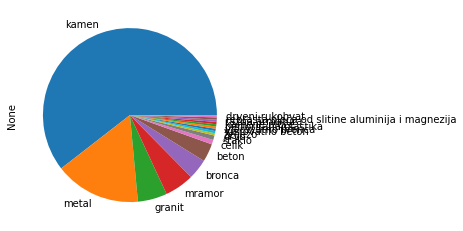

In [ ]:
df['materijal izgradnje spomenika'].dropna().str.strip().str.lower().str.replace("vjerojatno ", "").str.split(',\s+',expand=True).stack().value_counts(normalize=True).plot.pie()

Rezultati analize:
Kao što smo pretpostaviti većina spomenika izgrađena je od kamena i metala.
To je i očekivano jer je:
* trajno
* jeftino
Bilo bi neočekivano da se nađu spomenici od:
* drva - jer nisu toliko trajni, podložni su prirodnoj eroziji, ali i lakše se uništavaju od strane ljudi
* zlata , plemenitih metala itd zbog skupocjenosti

# Datum izgradnje

Datum izgradnje nam pomaže da smjestimo spomenik/spomen ploču u određeno razdoblje. Često će datum biti vidljiv na samom spomeniku/spomen ploči no postoje situacije u kojima informacije o datumu izgradnje ne postoje ili su nam poznati samo dijelovi, kao npr. godina bez točnog datuma. (Arijana Kovač)

Ukoliko nema datuma ostaviti 1-1-godina kao format. (BP)

In [ ]:
df['datumIzgradnje']

0     1966-01-01
1            NaT
2            NaT
3     2012-10-30
4            NaT
         ...    
167          NaT
168          NaT
169          NaT
170          NaT
171   2014-05-09
Name: datumIzgradnje, Length: 172, dtype: datetime64[ns]

In [ ]:
df['datumIzgradnje'].dropna().mean()

Timestamp('1976-09-05 05:52:20.425531904')

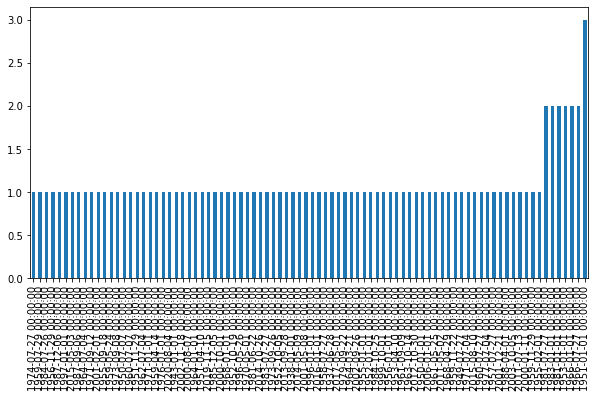

In [ ]:
df['datumIzgradnje'].value_counts(ascending=True).plot.bar(figsize=[10,5])

# Wikipedija o spomeniku
Wikipedija je mogući dodatni izvor informacija o predmetnom spomeniku ili spomen ploči. Wikipedija je zbir obrade, manipulacije, organizacije i ponude podataka širokim sloju primatelja. Neodostatak Wikipedije kao jedinog izvora informacija je koncepta slobodnog sadržaja što proizvodi
upitnu pouzdanost, neravnomjernu kvalitetu, ponekad nepotkrijepljene stavove, pristranost sustava i točnost podataka.
(Maša)

In [ ]:
df["wikipedija o spomeniku"].value_counts()

-                                                                                                                                                                                                      21
/                                                                                                                                                                                                      19
nema                                                                                                                                                                                                    7
nema članka                                                                                                                                                                                             5
https://hr.wikipedia.org/wiki/Park_istarskih_velikana                                                                                                                                           

## Ekstrakcija podataka sa wikipedije.
 
Korištenjem paketa wikipedia možemo preuzeti niz podataka o spomenicima kao i reference na druge umrežene podatke.

## Korištenje Wikipedia API
Wikipedija je razvila API koji se može koristiti za različite upite.

https://www.mediawiki.org/wiki/API:Main_page


Na stranici 
https://www.mediawiki.org/w/api.php?action=help&modules=query
opisane su mogućnosti upita.
Primjerice, naslovi vezani uz rat, uz vraćanje linkova sa hr.wikipedia.org dobiva se 

https://hr.wikipedia.org/w/api.php?action=query&titles=rat&prop=links&pllimit=max

želimo li i kategorije

https://hr.wikipedia.org/w/api.php?action=query&titles=rat&prop=categories&pllimit=max


## Jednostavno korištenje Wikipedia API preko paketa Wikipedia
Wikipedia je Python biblioteka koja olakšava pristup i raščlanjivanje podataka s Wikipedije.

Pretražujte Wikipediju, dobivajte sažetke članaka, dobivajte podatke poput veza i slika sa stranice i još mnogo toga. Wikipedia omotava MediaWiki API tako da se možete usredotočiti na korištenje podataka Wikipedije, a ne na njihovo dobivanje.
Resursi:
* https://github.com/goldsmith/Wikipedia github stranica
* https://wikipedia.readthedocs.io/en/latest/code.html#api dokumentacija 


In [ ]:
# instalacija paketa
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=8b223dae4917c6e8f29750ae16d3139db970efe85ec4e076e9d85022e4d3bd6c
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import wikipedia

### Postavljanje jezika
Wikipedija ima niz jezika koji na različite načine bilježe informacije o potencijalno istome događaju. U tome smislu moguće je izvući podatke na različite načine.

In [ ]:
# Ručno postavljanje jezika pomoću vrijednosti
wikipedia.set_lang("hr")

Prvo moramo dobiti jezik i identifikacijski naziv stranice iz https linka.

In [ ]:
for i in df['wikipedija o spomeniku'].dropna():
  if "https" in i:
    jezik= i.split("/")[2].split(".")[0]
    id= i.split("/")[4].split(".")[0].replace("_"," ")
    print(jezik, id, i)

en Jasenovac concentration camp https://en.wikipedia.org/wiki/Jasenovac_concentration_camp
hr Olga Ban https://hr.wikipedia.org/wiki/Olga_Ban
sr %D0%A0%D0%B0%D1%82%D0%BA%D0%BE %D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%9B %D0%8B%D0%B8%D1%9B%D0%BA%D0%BE  Nema članka, naveden kao slika na sljedećem: https://sr.wikipedia.org/wiki/%D0%A0%D0%B0%D1%82%D0%BA%D0%BE_%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B8%D1%9B_%D0%8B%D0%B8%D1%9B%D0%BA%D0%BE 
sr %D0%94%D1%80%D0%B0%D0%B3%D0%BE%D1%99%D1%83%D0%B1 %D0%A0%D0%B0%D0%B4%D0%BE%D1%81%D0%B0%D0%B2%D1%99%D0%B5%D0%B2%D0%B8%D1%9B %D0%A2%D0%BE%D0%BF%D0%BB%D0%B8%D1%86%D0%B0 https://sr.wikipedia.org/sr-el/%D0%94%D1%80%D0%B0%D0%B3%D0%BE%D1%99%D1%83%D0%B1_%D0%A0%D0%B0%D0%B4%D0%BE%D1%81%D0%B0%D0%B2%D1%99%D0%B5%D0%B2%D0%B8%D1%9B_%D0%A2%D0%BE%D0%BF%D0%BB%D0%B8%D1%86%D0%B0
sr %D0%A1%D0%BF%D0%BE%D0%BC%D0%B5%D0%BD%D0%B8%D0%BA %D0%BE%D1%81%D0%BB%D0%BE%D0%B1%D0%BE%D0%B4%D0%B8%D0%BE%D1%86%D0%B8%D0%BC%D0%B0 %D0%9D%D0%B8%D1%88%D0%B0 https://sr.wikipedia.org/sr-el/%D0%A

### Wikipedia Sažetak

In [ ]:
wikipedia.page("""Park istarskih velikana""").summary

'Park istarskih velikana, gradski park u središtu Pazina. Park je posvećen značajnim osobama istarske povijesti, a svakoj od njih podignuta je bista u parku. Među 14 različitih bista mogu se pronaći one biskupa Jurja Dobrile, književnika Vladimira Nazora, narodnih heroja Joakima Rakovca, Olge Ban, Giuseppea Budicina - Pina, Vjekoslava Ivančića i drugih. U parku su zasađene rijetke biljne vrste.'

Tekst možemo koristi u reprezentaciji tako da stavimo kratki sažetak u Hover, a cijeli tekst negdje u Popup.

### Wikipedia Kategorije

In [ ]:
wikipedia.set_lang("hr")
wikipedia.page("""Olga_Ban """).categories
# wikipedia.WikipediaPage(original_title="%D0%A2%D0%BE%D0%BF%D0%BB%D0%B8%D1%87%D0%BA%D0%B8_%D0%BF%D0%B0%D1%80%D1%82%D0%B8%D0%B7%D0%B0%D0%BD%D1%81%D0%BA%D0%B8_%D0%BE%D0%B4%D1%80%D0%B5%D0%B4")

['Kategorija:Narodni heroji Jugoslavije', 'Kategorija:Životopisi, Pazin']

Jesu li kategorije relevantne? 
Jesu - barem jedna izgleda da je vezana uz kontekst pretrage u domeni "spomeničke baštine, kulture sjećanja".
Očekujemo da će se pojaviti neke centralne kategorije, a da će specifičnosti omogućiti stvaranje strukture u setu naših podataka. Metodu koju možemo kasnije koristiti je graf teorija. 


### Wikipedia Slike

In [ ]:
wikipedia.set_lang("hr")
wikipedia.page("""Olga_Ban """).images

['https://upload.wikimedia.org/wikipedia/commons/1/1b/Flag_of_Croatia.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/19/Olga_Ban%2C_Pula.JPG']

Neke od slika možemo iskoristiti u reprezentaciji.

### Wikipedia Reference

In [ ]:
wikipedia.set_lang("sr")
wikipedia.page("""Spomenik oslobodiocima Niša""").references

['http://www.androidvodic.com/info_nis-niska-banja_spomenici_spomenik-oslobodiocima#Spomenik+Oslobodiocima+Ni%C5%A1',
 'http://www.visitnis.com/spomenik-oslobodiocima-nisa.html',
 'http://www.ubnt.ni.ac.rs/images/stories/materijal/digitalna%20biblioteka/pdf/razno/DGB_00190_Spomenik_oslobodiocima_Nisa_1937.pdf',
 'http://www.ni.rs',
 'https://web.archive.org/web/20100622010517/http://www.arhivnis.co.rs/cirilica/idelatnost/br%203/cotkrivspom.htm',
 'https://web.archive.org/web/20140121092238/http://www.visitnis.com/spomenik-oslobodiocima-nisa.html',
 'https://web.archive.org/web/20150413165423/http://www.androidvodic.com/info_nis-niska-banja_spomenici_spomenik-oslobodiocima',
 'https://digitalna.nb.rs/wb/NBS/novine/vreme/1936/12/23?pageIndex=00007']

Nećemo za sada prikazivati te podatke u vizualnoj reprezentaciji ali možemo zadržati taj resurs u nekom stupcu df["Wiki_reference"] 

# Wikipedija o spomeniku

Ova kategorija prikuplja podatke o samom spomeniku zabilježene na wikipediji.

In [ ]:
df["wikiOSpomeniku"]

0      https://en.wikipedia.org/wiki/Stone_Flower_(sc...
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
167                                                  NaN
168                                                  NaN
169                                                  NaN
170                                                  NaN
171                                                  NaN
Name: wikiOSpomeniku, Length: 172, dtype: object

# Wikipedija o povijesnom događaju

Ova kategorija prikuplja podatke o povijesnom događaju zabilježene na wikipediji.

In [ ]:
df['wikipedija o povijesnom događaju'].dropna().str.lower().str.replace(" ", "").str.strip().str.split(",", expand=True).stack().value_counts()

https://hr.wikipedia.org/wiki/drugi_svjetski_rat                  38
https://hr.wikipedia.org/wiki/domovinski_rat                      24
https://hr.wikipedia.org/wiki/narodnooslobodila%c4%8dki_pokret    21
https://hr.wikipedia.org/wiki/drugi_svjetski_rat_u_jugoslaviji    12
https://hr.wikipedia.org/wiki/narodnooslobodilački_rat             6
                                                                  ..
https://hr.wikipedia.org/wiki/pro%c5%a1tinska_buna                 1
https://hr.wikipedia.org/wiki/nato-ovo_bombardiranje_srj           1
/                                                                  1
https://sh.wikipedia.org/wiki/ix._bojna_rafael_vitez_boban         1
https://hr.wikipedia.org/wiki/prvi_srpski_ustanak                  1
Length: 65, dtype: int64

# Podaci o ratu

Petra

In [ ]:
df["rat"].value_counts()

WW2                                                                  110
ratovi 90-tih                                                         24
Domovinski rat                                                        16
WW1                                                                    4
Spomenik novinaru Ivanu Vukiću                                         1
Posvećen Narodnooslobodilačkoj borbi                                   1
Spomenik prvom hrvatskom predsjedniku                                  1
nečitak tekst na spomeniku                                             1
Drugi svjetski rat i Domovinski rat                                    1
Prvi i Drugi srpski ustanak, Balkanski ratovi i Prvi svjetski rat      1
Spomenik prvom pisanom spomenu sela Zamasline                          1
teško odredivo                                                         1
NOB                                                                    1
3.12.1915. obrana kralja i domovine                

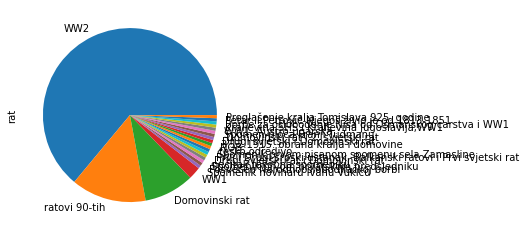

In [ ]:
df["rat"].value_counts().plot.pie()

# Autor spomenika
Na temelju podataka o autoru spomenika/spomen ploče dobivamo uvid u neke od najpoznatijih umjetnika koji su djelovali ili još djeluju na ovim prostorima. Mogući nedostatak je nepostojanje informacija o samom autoru spomenika.
(Arijana Kovač)

In [ ]:
df = importiraj()

In [ ]:
autori= df['autorSpomenika'].str.strip().str.split(", ", expand=True).stack().value_counts()
autori

/                                                            14
-                                                             9
Velibor Mačukatin                                             3
Vinko Matković                                                3
Nandor Glid                                                   2
Alija Kučukalić                                               2
Dušan Džamonja                                                2
Antun Augustinčić                                             2
Bogdan Bogdanović                                             1
Hrvatsko društvo logoraša srpskih koncentracijskih logora     1
Drinka Radoić                                                 1
NFO i prof. Petar Barišić                                     1
Aleksandar Rukavina                                           1
Belizar Bahović                                               1
Milivoj Bokić                                                 1
Belizar Bahorić                         

In [ ]:
# wikipedia o autoru
for autor in autori.index.tolist():
  try:
    wikipedia.set_lang('hr')
    print('**  ', autor, '  **')
    print('hr:', wikipedia.page(title=autor, auto_suggest=False).summary)
    print(wikipedia.page(autor).categories)
    print(wikipedia.page(autor).images)
  except:
    pass
  try:
    wikipedia.set_lang('sr')
    print('sr:', wikipedia.page(title=autor, auto_suggest=False).summary)
  except:
    pass
  try:
    wikipedia.set_lang('en')
    print('en:', wikipedia.page(title=autor, auto_suggest=False).summary)
  except:
    pass


**   /   **
en: The slash is an oblique slanting line punctuation mark /. Once used to mark periods and commas, the slash is now used to represent exclusive or inclusive or, division and fractions, and as a date separator. It is called a solidus in Unicode, is also known as an oblique stroke, and has several other historical or technical names including oblique and virgule.
A slash in the reverse direction \ is known as a backslash.


**   -   **
en: The hyphen-minus - is the most commonly used type of hyphen, widely used in digital documents. It is the only hyphen character provided in many character sets such as ASCII or on most keyboards, therefore in programming languages and spreadsheets it functions as the minus sign. The name "hyphen-minus" derives from the original ASCII standard, where it was called "hyphen (minus)"; the character is referred to as a hyphen or a minus sign according to the context where it is being used. It is often called a "dash", though it is normally short

/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


**   Hrvatsko društvo logoraša srpskih koncentracijskih logora   **
hr: Hrvatsko društvo logoraša srpskih koncentracijskih logora osnovano je 17. svibnja 1995., s ciljem:

Adresa društva je: Trg Josipa Bana Jelačića 6/4 Zagreb
Društvo obilježava godišnjice ratnih zbivanja, izdaje knjige te pomaže pri dizanju spomenika. U 2004-toj društvo je otvorilo centar u Borovom naselju čiji je cilj istraživanje ratnih zločina. Centar su otvorili Jadranka Kosor i Vladimir Šeks.U 2006.-toj društvo je primljeno u Svjetski savez veterana. Predsjednik društva (podatak valjan 2007.) je prof. Danijel Rehak.
['Kategorija:CS1 greške: nedostaje periodika', 'Kategorija:CS1 održavanje: arhivirana kopija u naslovu', 'Kategorija:Hrvatske braniteljske udruge']
['https://upload.wikimedia.org/wikipedia/commons/f/fa/Wikiquote-logo.svg', 'https://upload.wikimedia.org/wikipedia/hr/c/c7/HDLSKL.PNG']
en: Croatian Association of Prisoners in Serbian Concentration Camps (Croatian: Hrvatsko društvo logoraša srpskih koncen

# Tekst spomenika
Tekst spomenika može biti od velike važnosti pri kontekstualizaciji i pozicioniranju određenih spomenika i/ili spomen ploča jer je upravo tekst glavnina njegovog sadržaja. Važno je pri ispisu teksta u ovoj kategoriji  paziti na autentičnost prijepisa, tj. sukladnost originalu. (Maša)

In [ ]:
# Koliko ima spomenika sa tekstom?
df["tekstSpomenika"].dropna().count()

157

Ukoliko želimo sve tekstove spojiti zajedno možemo to učiniti korištenjem:
* `"\n ".join(x for x in series)` koja spaja svaki član niza u cjelinu odvojen novim redkom

In [ ]:
# svi tekstovi spojeni zajedno
svi_textovi = "\n ".join(x for x in df["tekstSpomenika"].dropna())
svi_textovi

'Šehidima i ostalim borcima Vratnika, te 69 imena i prezimena.\n U spomen na poginule branitelje Domovinskog rata\n\nBrdar Dragan    1950-1991\nPetrušić Zlatko 1955-1991\nKrizmanić Alen 1968-1991\nVučić Marijan    1965-1991\nVujnović Mane  1955-1993\n\n"Navik on živi ki zgine pošteno"\n\nSpomenik podižu branitelji i građani grada Vrbovsko\n <glavni>Spomen mladim generacijama nek pamte da su dana 10. 8. 1944. fašističke horde spalili ovo selo i odveli u logore sedam omladinki \nZa trajno sjećanje na poginule u toku N.O.B-e podižemo ovaj spomenik</glavni>\n<imena>Mihajić Vinko 1923 - 1944\nsekretar K. K. K.P.H. za Kras\nŠverko Ivan 1910 - 1944\nZlatić Grgo 1904 - 1943\n</imena>\n<inicijator>Narod sela Klenovšćak</inicijator>\n <glavni>USTANAK NARODA GORSKOG KOTARA 1941 - 1945</glavni>\n U narodnooslobodilačkoj borbi od 1943 - 1945 pali su kao borci za slobodu i žrtve fašističkog terora, popis imena palih boraca i godine njihovog rođenja/smrti, spomenik palim borcima podigao narod Vrhušći

## Obrada teksta korištenjem računalnih metoda
Procesiranje teksta se može napraviti uporabom nekoliko metoda:
* obrada riječi bez morfosintaktičkog parsiranja (tokenizacija)
* obrada riječi s morfosintaktičkim parsiranjem (lematizacija) 
* obrada riječi prema vrsti (POS analiza)
* obrada riječi prema sintaktičkim obilježjima (sintaktičko parsiranje)


### Metoda 1: prebrojavanje riječi, tokenizacija bez morfosintaktičkih obilježja
Ovo je najjednostavnija metoda pomoću koje dobivamo riječi kao prebrojive vrijednosti. 

Prednost je u tome što ne zahtjeva pozivanje nikakvih dodatnih paketa za jezičnu obradu.

Nedostatak je u tome što se pod riječju smatra bilo koji niz znakova odvojen razmakom (definirano metodom `.split(' ')`) 

Za hrvatski je to problematično jer se primjerice kuća broji kao druga vrijednost od kući, kućama, itd... 

U nastavku je primjer takve obrade korištenjem sljedećih metoda:
* .dropna() miče prazne vrijednosti
* `str.strip()` uklanja praznine sa strane
* `str.lower()` prebacuje u mala slova 
* `str.split(' ', expand=True)` splita tekst prema prazninama i  expandira svaku vrijednost u novi stupac 
* `.stack()` poslaže sve u jedan stack 
* `.value_counts()` vrijednosti prebraja

In [ ]:
# tekstSpomenika. makni prazne vrijednosti. ukloni praznine sa strane . prebaci u mala slova . splitaj tekst prema prazninama i  expandiraj svaku vrijednost u novi stupac . posloži sve u jedan stack . izbroj vrijednosti . pokaži prvih 30
df["tekstSpomenika"].dropna().str.strip().str.lower().str.split(' ',expand=True).stack().value_counts()[0:30]

i              173
u              131
-              100
na              58
za              52
su              50
je              47
spomen          42
od              33
borcima         31
                29
palim           25
boraca          23
se              21
iz              20
da              20
slobodu         20
narod           19
fašističkog     18
koji            17
žrtvama         16
imena           15
podiže          15
živote          14
svoje           14
borbi           14
godine          14
poginulim       12
spomenik        12
rata            12
dtype: int64

### Korištenje NLP paketa za obradu jezičnih podataka

In [ ]:
# instalirati paket
!pip install spacy_udpipe
# importirati u memoriju
import spacy_udpipe
# downloadirati hr model
spacy_udpipe.download("hr")
# aktivirati (loadati) hr pipeline model
nlp_hr= spacy_udpipe.load("hr")

     |████████████████████████████████| 304 kB 24.1 MB/s 
     |████████████████████████████████| 6.0 MB 36.6 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 451 kB 50.7 MB/s 
     |████████████████████████████████| 181 kB 57.5 MB/s 
     |████████████████████████████████| 10.1 MB 48.7 MB/s 
     |████████████████████████████████| 628 kB 44.5 MB/s 
  Created wheel for ufal.udpipe: filename=ufal.udpipe-1.2.0.3-cp37-cp37m-linux_x86_64.whl size=5626659 sha256=1b233899472161a8d084557c4ec7c2629943d972e81937ebfabfb0e1d2b813a7
  Stored in directory: /root/.cache/pip/wheels/b8/b5/8e/3da091629a21ce2d10bf90759d0cb034ba10a5cf7a01e83d64
Successfully built ufal.udpipe
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Success

In [ ]:
#  isprocesirati svi_textovi pomoću nlp_hr pipelinea
doc_hr = nlp_hr(svi_textovi)
# želimo sve u pandama obraditi 
# stvorimo dataFrame koji procesira token argumente generirane list comprehension metodom u koju hvatamo rezultate parsiranja
# ključevi stupaca
cols = ("token", "lemma", "POS", "conjuncts", "tag", "dep", "head", "head_i")
df_svi_textovi = pd.DataFrame([(token.text, token.lemma_, token.pos_, token.conjuncts, token.tag_, token.dep_, token.head, token.head.i) for token in doc_hr], columns=cols)   
df_svi_textovi


,token,lemma,POS,conjuncts,tag,dep,head,head_i
0,Šehidima,Šehidi,ADJ,"(ostalim,)",Agpmpiy,amod,borcima,3
1,i,i,CCONJ,(),Cc,cc,ostalim,2
2,ostalim,ostali,ADJ,"(Šehidima,)",Agpmpiy,conj,Šehidima,0
3,borcima,bork,NOUN,"(imena, prezimena)",Ncmpi,ROOT,borcima,3
4,Vratnika,Vratnik,PROPN,(),Npmsg,nmod,borcima,3
...,...,...,...,...,...,...,...,...
4884,",",",",PUNCT,(),Z,punct,Mrtvima,4881
4885,prolazniče,prolaznicati,VERB,(),Vmr3s,ROOT,prolazniče,4885
4886,pogni,pognuti,VERB,(),Vmm2s,iobj,prolazniče,4885
4887,svoju,svoj,DET,(),Px-fsa,det,glavu,4888


In [ ]:
# koliko ima pojmova? pogledajmo prvih 30
df_svi_textovi['lemma'].str.lower().value_counts()[0:30]

i           187
u           146
,           145
biti        138
.           137
-           100
na           58
"            54
za           54
1944         51
ovaj         48
spomen       48
borac        46
narod        44
žrtva        39
svoj         38
bork         34
od           33
rat          30
godina       29
sloboda      28
ime          28
hrvatski     26
sebe         25
život        24
da           23
ploča        23
podizati     23
borba        22
paliti       21
Name: lemma, dtype: int64

podizati       21
dati           10
poginuliti      9
pasti           9
poginuti        8
paliti          8
podići          4
živjeti         4
imati           4
jula            3
postavljati     3
hvati           3
umrijeti        3
izvršiti        2
boriti          2
osloboditi      2
poginula        2
ubiti           2
ostati          2
položiti        2
Name: lemma, dtype: int64


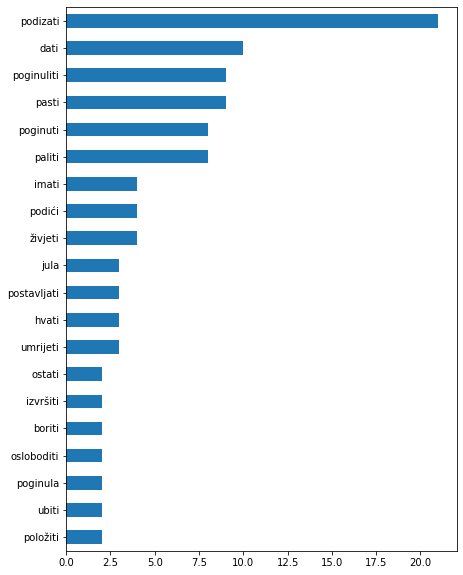

In [ ]:
# koliko ima imenskih pojmova? pogledajmo prvih x
broj= 20
pojam_filter_pos= df_svi_textovi[df_svi_textovi['POS']=='VERB']['lemma'].str.lower().value_counts()[0:broj]
print(pojam_filter_pos)
pojam_filter_pos.sort_values(ascending=True).plot.barh(figsize=[7,10])

# Komemoracija na spomeniku
Vjeko

In [ ]:
df['komemoracijaNaSpomeniku'].dropna().value_counts()

/                                                                                                                                                                                                                                                                                                          15
-                                                                                                                                                                                                                                                                                                           9
nema                                                                                                                                                                                                                                                                                                        3
Goranovo proljeće                                                                             

# Datum komemoracije na spomeniku
Datum komemoracije na spomeniku bilježi datum kada se u kolektivnoj svijesti potiče oživljavanje sjećanja.

Moguće je povezati podatke s Google Trends za dodatno mjerenje istaknutosti komemoracije.

In [ ]:
df['datumKomemoracijeNaSpomeniku'].dropna().value_counts()

/                                                                                                                                                                                                                                                                                                                                                                                                                                     17
-                                                                                                                                                                                                                                                                                                                                                                                                                                      9
4.10.                                                                                                                                                 

# Stanje spomenika
Stanje spomenika govori o trenutnoj materijalnoj brizi za spomenik.

Moguće je povezati podatke o kulturnoj baštini RH ili podacima za obnovu spomenika.

In [ ]:
df['stanjeSpomenika'].value_counts()

izvorno stanje                                                                                                                                     128
oštećeno                                                                                                                                            34
obnovljeno                                                                                                                                           4
izmijenjeno                                                                                                                                          2
Replika uništenog spomenika                                                                                                                          1
Premješten je sa prostora vojarne Drgomalj na prostor ispred zgrade Uprave Grada Delnice, na središnjem prostoru današnjeg Trga 138. brigade HV      1
Tekst na spomeniku je izblijedio te je teže razaznati što piše                                

In [ ]:
df['stanjeSpomenika'].value_counts(normalize=True)

izvorno stanje                                                                                                                                     0.744186
oštećeno                                                                                                                                           0.197674
obnovljeno                                                                                                                                         0.023256
izmijenjeno                                                                                                                                        0.011628
Replika uništenog spomenika                                                                                                                        0.005814
Premješten je sa prostora vojarne Drgomalj na prostor ispred zgrade Uprave Grada Delnice, na središnjem prostoru današnjeg Trga 138. brigade HV    0.005814
Tekst na spomeniku je izblijedio te je teže razaznati što piše  

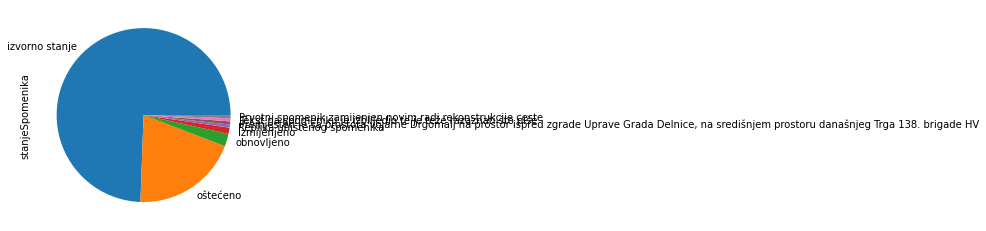

In [ ]:
df['stanjeSpomenika'].value_counts().plot.pie()

# Muzej ili memorialni centar.
Ova kategorija govori o postojanju centra koji se bavi kulturom sjećanja.


In [ ]:
df['muzejMemorialniCentar'].value_counts()

-                                                    21
/                                                    18
nema                                                  3
Memorijalni muzej Ivana Gorana Kovačića, Lukovdol     2
Ne                                                    1
Memorijalni park Bubanj                               1
Običan spomenik.                                      1
Muzej Domovinskog rata Karlovac - Turanj              1
Spomen dom prvog partijskog savjetovanja za Istru     1
memorialni kompleks Tjentište                         1
Name: muzejMemorialniCentar, dtype: int64

# Mjesto
Mjesto govori o mjestu ili području na kojem se nalazi spomenik.

In [ ]:
# koja su mjesta zabilježena u podacima
df['mjesto'].value_counts()

-                                 11
Trebinje, Bosna i Hercegovina      9
Vukovar                            6
Bakar                              5
Klana                              4
                                  ..
Klenovšćak                         1
Park istarskih velikana, Pazin     1
Plovanija, Hrvatska                1
Đakovo                             1
Klenovica                          1
Name: mjesto, Length: 120, dtype: int64

# Geo mapiranje i vizualizacija spomenika

Geo mapiranje služi za vizualizaciju smještaja spomenika. Za vizualizaciju koristimo paket Folium i Google Maps.

<p><img alt="Colaboratory logo" height="45px" src="https://python-visualization.github.io/folium/_images/folium_logo.jpg" align="left" hspace="10px" vspace="0px"></p>
<h1>Folium</h1>

**Folium** makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich vector/raster/HTML visualizations as markers on the map.

The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. folium supports both Image, Video, GeoJSON and TopoJSON overlays.

Get started  on:
* https://python-visualization.github.io/folium/quickstart.html#Getting-Started 

In [ ]:
#install folium in Google Colab
! pip install folium

In [ ]:
# import folium in memory
import folium

In [ ]:
# create a map of a region using the predefined coordinates and zoom
import folium
m = folium.Map(location=[45.327431, 16.463191], tiles='Stamen Terrain', zoom_start=6)
m

In [ ]:
# vidi geolokacije
df[['geolokacija', 'nazivSpomenika', 'mjesto']]

,geolokacija,nazivSpomenika,mjesto
0,"45.278032, 16.928472",Monument to the victims of the Jasenovac conce...,Jasenovac
1,"45.641078, 16.777844",Podgarić,Podgarić
2,"43.864189, 18.436773",Spomenik šehidima i poginulim borcima Vratnika,"Sarajevo, BiH"
3,"45.373026, 15.075592",Spomenik poginulim braniteljima Domovinskog rata,"gradsko groblje Krš, Vrbovsko"
4,"45.44191591259192, 14.048563495506517",Spomenik poginulima u toku NOB-a,Klenovšćak
...,...,...,...
167,"45.229896513805635, 16.370026491839887",Spomenik palim borcima,Zrin
168,"45.53757857031168, 16.420647468769232",Spomen ploča Debeli Brijest u Brezovici,Brezovica
169,"45.89880302796704, 16.842344035170388",Spomenik poginulim braniteljima u Domovinskom ...,Bjelovar
170,/,Spomenik Anki Butorac,Nepoznato


In [ ]:
# latitude - ekstrahirati broj s lijeve strane
df['geolokacija'].str.split(',', expand=True)[0]

0               45.278032
1               45.641078
2               43.864189
3               45.373026
4       45.44191591259192
              ...        
167    45.229896513805635
168     45.53757857031168
169     45.89880302796704
170                     /
171              43.50980
Name: 0, Length: 172, dtype: object

In [ ]:
# longitude - ekstrahirati broj s desne strane zareza
df['geolokacija'].str.split(',', expand=True)[1]

0                16.928472
1                16.777844
2                18.436773
3                15.075592
4       14.048563495506517
              ...         
167     16.370026491839887
168     16.420647468769232
169     16.842344035170388
170                   None
171               16.46807
Name: 1, Length: 172, dtype: object

Sada imamo sve što je potrebno da vizualiziramo podatke na mapi: naziv spomenika, geolokaciju. 

In [ ]:
# Krenimo s jednim markerom
# Define the area
start=[45.327431, 16.463191]
m = folium.Map(location=start,zoom_start=8,tiles='Stamen Terrain')
# set the tooltip and popup text data
# for index, row in df.iterrows():

# Popup treba imati:
# naziv, mjesto, slika (na lijevo po mogućnosti)+sliderHTML, autor, datumpostavljanja, horruler, tekstSpomenika, linkNaWikiODogađaju, linkNaWikiODogađaju, 


tooltip = df['nazivSpomenika'][3]
#row.mjesto
uploadImg="https://drive.google.com/file/d/1uMFBO-fDXc2CGUS1H4D32udpS1MDE21m/view"
iframeSrc=uploadImg.replace('/view', '/preview') #google treba preview a ne view kao završetak
image = '<iframe src="'+iframeSrc+'" width="200" ></iframe>'
#row.uploadSlike
text= df['tekstSpomenika'][3]
mjesto= df['mjesto'][3]
# row.nazivSpomenika
lon = float(df['geolokacija'][3].split(',')[0])
lat=  float(df['geolokacija'][3].split(',')[1]) 
# row.geolokacija

popupContent= folium.Html(f'<div id="" style="overflow:scroll; height:300px;"><h5>'+tooltip+'</h5>'+
                          f'<p><i>'+mjesto+'</i></p>'+
                          f'<p>'+image+'</p>'+  
                        f'<p>{text}</p><hr></div>', script=True)
popup= folium.Popup(popupContent, max_width=200)

#creating a Marker on coordinates
folium.Marker([lon, lat], popup=popup, tooltip=tooltip).add_to(m)

# let's see the map
m

## Mapping multiple markers

In [ ]:
df= importiraj()
# Define the area
start=[45.327431, 16.463191]
m = folium.Map(location=start,zoom_start=8,tiles='Stamen Terrain')

# iteracija kroz sve podatke 
count_false=0 
for index, row in df.iterrows():
  # tooltip
  try:
    tooltip = row['nazivSpomenika']
  except:
    print("tooltip Error ", row.nazivSpomenika)
    tooltip = '-'
  # image
  try:  
    uploadImgList=str(row.uploadSlike)
    uploadImg= uploadImgList.split(",")[0]
    iframeSrc= uploadImg.replace("open?id=", "file/d/")+'/preview'
    # iframeSrc=uploadImg.replace('/view', '/preview') #google treba preview a ne view kao završetak
    image = '<iframe src='+iframeSrc+' width="200"></iframe>'
  except:
    print("image Error ", row.nazivSpomenika)
    image = "<iframe src='https://www.svgrepo.com/show/3472/monument.svg'+' width='200'></iframe>"
  # mjesto
  try: 
    mjesto= row['mjesto']
  except:
    print("mjesto Error ", row.nazivSpomenika)
    mjesto = '-'
  # godina
  try: 
    if not row.datumIzgradnje:
      datum= "-"
    else:
      datum= str(row.datumIzgradnje)[0:4]
  except:
    print("datum Error", row.nazivSpomenika)
    
  # autor
  try:  
    if not row['autorSpomenika']:
      autor="-"
    else: 
      autor = str(row['autorSpomenika']) 
  except:
    print("autor Error ", row.nazivSpomenika)
    autor = "-"
  
  # text spomenika
  try:
    text= row['tekstSpomenika']
  except:
    print("text Error ", row.nazivSpomenika)
    text = "-"
  
  # rat
  try:
    rat= str(row.rat)
    if 'WW1' in rat:
      marker_c = 'red'
    if 'WW2' in rat:
      marker_c = 'blue'
    if 'Domovinski' in rat:
      marker_c = 'green'
    if '90' in rat:
      marker_c = 'pink'
  except:
    marker_c = 'white'
  # lon, lat
  try:
    lon = float(str(row['geolokacija']).split(',')[0])
    lat=  float(str(row['geolokacija']).split(',')[1]) 
  except:
    print("lonlat error", row.nazivSpomenika)
  
  #popup content
  try:    
    popupContent= folium.Html(f'<h4><b>'+tooltip+'</b></h4>'+
                          f'<p><i>lokacija: </i>'+mjesto+'</p>'+
                          f'<div id="" style="overflow:scroll; height:300px;"><p>'+image+'</p>'+ 
                          f'<p><i>autor: </i>'+autor+'</p>'+ 
                          f'<p><i>datum izgradnje: </i>'+datum+'</p>'+ 
                          f'<p><i>rat: </i>'+rat+'</p>'+
                          f'<hr><p><i>Tekst:   </i>{text}</p><hr></div>', 
                          script=True)
    popup= folium.Popup(popupContent, max_width=220)
    #creating a Marker on coordinates
    folium.Marker([lon, lat], popup=popup, tooltip=tooltip, icon=folium.Icon(color=marker_c, icon="bank", prefix='fa')).add_to(m)
  except:
      # print("popupContent Error", row.nazivSpomenika)
      count_false=count_false+1
      pass

  
# map diagnostics
print(f'Neispravnih dokumenata je: {count_false}.')

# snimamo mh-mapa.html na colab drive
m.save("mh-mapa.html")

# pregledavamo izgled
m

lonlat error Narodnom heroju Dragoljubu Radosavljeviću Toplici
lonlat error Socijalistički apstraktni spomenik
lonlat error Apstraktni spomenik u prirodi
lonlat error Spomenik kralju
lonlat error Narodni heroj Milić Radovanović
lonlat error Stojanović Radojko Mališa
lonlat error Palim borcima kopaoničkog kraja
lonlat error Spomen ploča
lonlat error Spomen ploča
lonlat error Poginulim borcima u ratovima 1992.-1999.
lonlat error Kameni spomenik
lonlat error Spomenik palim sovjetskim vojnicima u Šumadiji
lonlat error Spomenik palim partizanima Blaca i Brus
lonlat error Spomenik palim borcima herojskih jedinica NOVJ i POJ
lonlat error Most hrvatskih Branitelja iz Domovinskog rata u Rijeci
lonlat error  Spomenik Anki Butorac
Neispravnih dokumenata je: 14.


### Enriching the data
Once you have created a map you can call the map with just with a variable - in this case: `m`.

This means you can always add to your map something new by using `.add_to(m)` function.

### Saving the data

In [ ]:
# you can also save your interactive map as html
m.save('index.html')

## Google Map Python Client

<p><img alt="Colaboratory logo" height="45px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Google_Maps_Logo_2020.svg/1137px-Google_Maps_Logo_2020.svg.png" align="left" hspace="10px" vspace="0px"></p>
<h1>Python Client for Google Maps Services</h1>
Use Python? Want to geocode something? Looking for directions? Maybe matrices of directions? This library brings the Google Maps Platform Web Services to your Python application.

The Python Client for Google Maps Services is a Python Client library for the following Google Maps APIs:

- Directions API
- Distance Matrix API
- Elevation API
- Geocoding API
- Geolocation API
- Time Zone API
- Roads API
- Places API
- Maps Static API

Keep in mind that the same terms and conditions apply to usage of the APIs when they're accessed through this library.

Support
This library is community supported. We're comfortable enough with the stability and features of the library that we want you to build real production applications on it. We will try to support, through Stack Overflow, the public and protected surface of the library and maintain backwards compatibility in the future; however, while the library is in version 0.x, we reserve the right to make backwards-incompatible changes. If we do remove some functionality (typically because better functionality exists or if the feature proved infeasible), our intention is to deprecate and give developers a year to update their code.

If you find a bug, or have a feature suggestion, please log an issue. If you'd like to contribute, please read contribute.

Requirements
Python 3.5 or later.
A Google Maps API key.
API Keys
Each Google Maps Web Service request requires an API key or client ID. API keys are generated in the 'Credentials' page of the 'APIs & Services' tab of Google Cloud console.

For even more information on getting started with Google Maps Platform and generating/restricting an API key, see Get Started with Google Maps Platform in our docs.

Important: This key should be kept secret on your server.

### Resources
- https://pypi.org/project/googlemaps/
- https://console.cloud.google.com/apis/credentials
- https://developers.google.com/maps/gmp-get-started

In [ ]:
# !pip install googlemaps

# import googlemaps
# #from datetime import datetime

In [ ]:
# placeName= "Pulska 46, Rijeka"
# key = '' 
# gmaps = googlemaps.Client(key)
# # Geocoding an address
# geocode_result = gmaps.geocode(placeName)
# geocode_result[0]

In [ ]:
# geoPosition= geocode_result[0]['geometry']['location']
# geoPosition

In [ ]:
# countryCode = geocode_result[0]['address_components'][6]
# countryCode

# Pronalaženje geolokacije preko geopy modula
Metoda 1: Dobivanje koordinata iz naziva lokacije
Uz navedenu lokaciju, moguće je korištenjem geopyja izvući koordinate što znači njegovu širinu i dužinu. Stoga se može koristiti za izražavanje lokacije u smislu koordinata.

In [ ]:
!pip install geopy

In [ ]:
# importing geopy library
from geopy.geocoders import Nominatim
 
# calling the Nominatim tool
loc = Nominatim(user_agent="GetLoc")

In [ ]:
# entering the location name
getLoc = loc.geocode("Podgarić")
 
# printing address
print(getLoc.address)
 
# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

Podgarić, Općina Berek, Bjelovarsko-bilogorska županija, 43233, Hrvatska
Latitude =  45.6416989 

Longitude =  16.7691597


Metoda 2: Dobivanje naziva lokacije prema zemljopisnoj širini i dužini
U ovoj metodi sve su stvari iste kao i gore, jedina razlika je u tome što umjesto korištenja funkcije geocode sada ćemo koristiti metodu reverse() koja prihvaća koordinate (latitude i longitude) kao argument, ova metoda daje adresu nakon dajući mu koordinate.

In [ ]:
# calling the nominatim tool
geoLoc = Nominatim(user_agent="GetLoc")

# passing the coordinates
locname = geoLoc.reverse("45.6416989, 16.7691597")
 
# printing the address/location name
print(locname.address)

Podgarić, Općina Berek, Bjelovarsko-bilogorska županija, 43233, Hrvatska


# Što je blizu prema Wikipediji
Ova funkcija ispisuje što se u Wikipediji nalazi blizu koordinata spomenika koristeći Wikipedia geosearch funkciju koja radi za hrvatski i engleski jezik.

In [ ]:
wikipedia.set_lang("hr")
# What is nearby in the wikipedia?
for index, row in df.iterrows():
  try: 
    result= wikipedia.geosearch(row.geolokacija.split(',')[0],row.geolokacija.split(',')[1], title=None, results=10, radius=10000)
    print(row.nazivSpomenika, result)
  except:
    pass

Monument to the victims of the Jasenovac concentration camp ['Gradina Donja', 'Uštica', 'Košutarica', 'Bročice', 'Ćuklinac', 'Višnjica Uštička', 'Tanac', 'Novska', 'Demirovac', 'Draksenić']
Podgarić ['Podgarić', 'Novo Selo Garešničko', 'Šimljanik', 'Gornja Garešnica', 'Moslavačka gora', 'Veliki Prokop', 'Oštri Zid', 'Krajiška Kutinica', 'Samarica (Ivanska)', 'Kutinica']
Spomenik šehidima i poginulim borcima Vratnika ['Franjevački samostan sv. Ante na Bistriku', 'Zavod sv. Augustina u Sarajevu', 'Katedrala Srca Isusova u Sarajevu', 'Samostan Egipat u Sarajevu', 'Čobanija (most)', 'Sarajevo', 'Kozja ćuprija', 'Gradsko groblje sv. Josip u Sarajevu', 'Gradsko groblje sv. Mihovil u Sarajevu', 'Stadion „Asim Ferhatović Hase”']
Spomenik poginulim braniteljima Domovinskog rata ['Vrbovsko', 'Vujnovići', 'Hambarište', 'Hajdine', 'Tuk (Vrbovsko)', 'Stubica (Vrbovsko)', 'Presika (Vrbovsko)', 'Radoševići (Vrbovsko)', 'Poljana (Vrbovsko)', 'Jablan (Vrbovsko)']
Spomenik poginulima u toku NOB-a ['Klen

In [ ]:
# What is nearby in the wikipedia?
wikipedia.set_lang("en")
for index, row in df.iterrows():
  try: 
    result= wikipedia.geosearch(row.geolokacija.split(',')[0],row.geolokacija.split(',')[1], title=None, results=10, radius=10000)
    print(row.nazivSpomenika, result)
  except:
    pass

Monument to the victims of the Jasenovac concentration camp ['Gradina Donja', 'Uštica', 'Košutarica', 'Bročice', 'Ćuklinac', 'Višnjica Uštička', 'Tanac', 'Novska', 'Demirovac', 'Draksenić']
Podgarić ['Podgarić', 'Novo Selo Garešničko', 'Šimljanik', 'Gornja Garešnica', 'Moslavačka gora', 'Veliki Prokop', 'Oštri Zid', 'Krajiška Kutinica', 'Samarica (Ivanska)', 'Kutinica']
Spomenik šehidima i poginulim borcima Vratnika ['Franjevački samostan sv. Ante na Bistriku', 'Zavod sv. Augustina u Sarajevu', 'Katedrala Srca Isusova u Sarajevu', 'Samostan Egipat u Sarajevu', 'Čobanija (most)', 'Sarajevo', 'Kozja ćuprija', 'Gradsko groblje sv. Josip u Sarajevu', 'Gradsko groblje sv. Mihovil u Sarajevu', 'Stadion „Asim Ferhatović Hase”']
Spomenik poginulim braniteljima Domovinskog rata ['Vrbovsko', 'Vujnovići', 'Hambarište', 'Hajdine', 'Tuk (Vrbovsko)', 'Stubica (Vrbovsko)', 'Presika (Vrbovsko)', 'Radoševići (Vrbovsko)', 'Poljana (Vrbovsko)', 'Jablan (Vrbovsko)']
Spomenik poginulima u toku NOB-a ['Klen